# CROP RECOMMENDATION SYSTEM

In [1]:
import numpy as np
import pandas as pd
crop = pd.read_csv("Crop_recommendation.csv")
#it is the classification problem because of supervised learning

In [2]:
print(crop)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [3]:
crop.head

<bound method NDFrame.head of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [4]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop.shape
# variable crop is our dataset
# Here we find the size of data
# [2200 rows x 8 columns]

(2200, 8)

In [6]:
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [7]:
crop.isnull().sum()
# null test
# it denotes not any null value are here

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
crop.duplicated().sum()
# no duplicate values are here

np.int64(0)

In [9]:
crop.describe()
# numerical feature or status check gareko
# statistics task gareko ho...
# (25%,N)=>21 bhnada kam data haru 25% xa...
# It is percentile, not percentage

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
numeric_crop = crop.select_dtypes(include=['number'])
corr = numeric_crop.corr()
corr
# here we find correlation
# aafai aafai sanga positive correlation hunxa

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

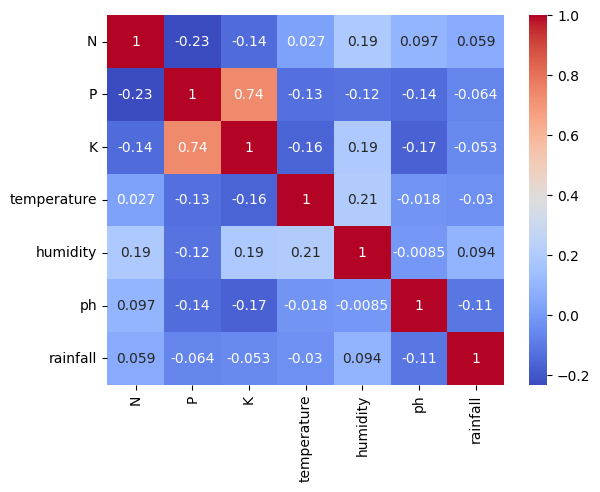

In [11]:
# Graphical representation of correlation
import seaborn as sns
sns.heatmap(corr, annot = True, cbar = True, cmap = "coolwarm")

In [12]:
crop['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

/tmp/ipykernel_22485/3584871093.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])


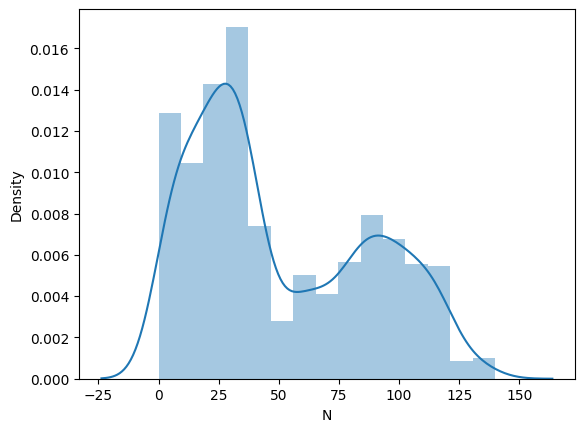

/tmp/ipykernel_22485/3584871093.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['P'])


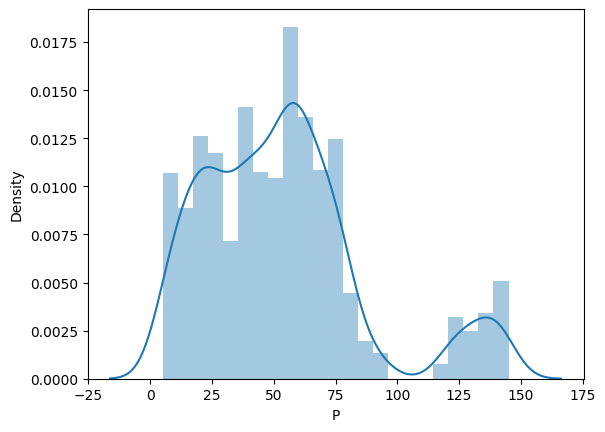

/tmp/ipykernel_22485/3584871093.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['K'])


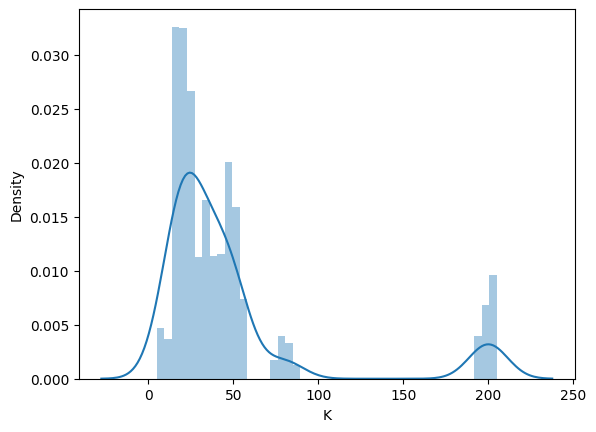

/tmp/ipykernel_22485/3584871093.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['temperature'])


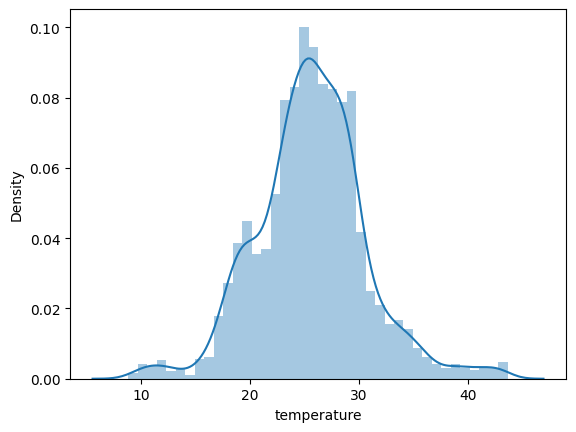

/tmp/ipykernel_22485/3584871093.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['humidity'])


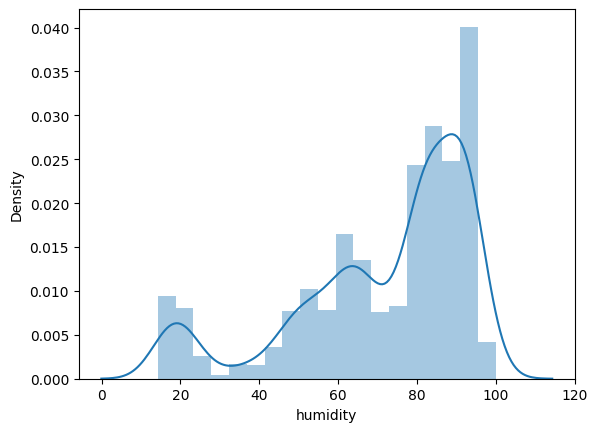

/tmp/ipykernel_22485/3584871093.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['ph'])


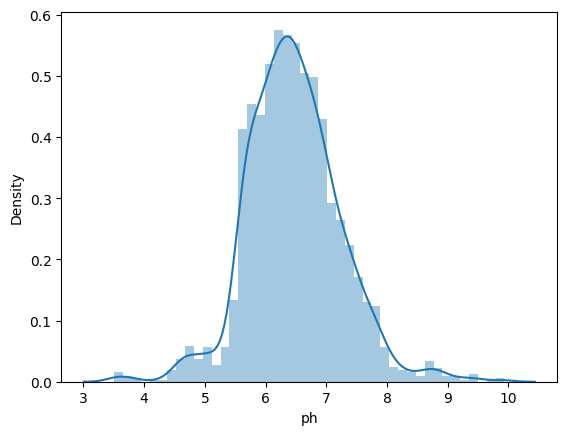

/tmp/ipykernel_22485/3584871093.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['rainfall'])


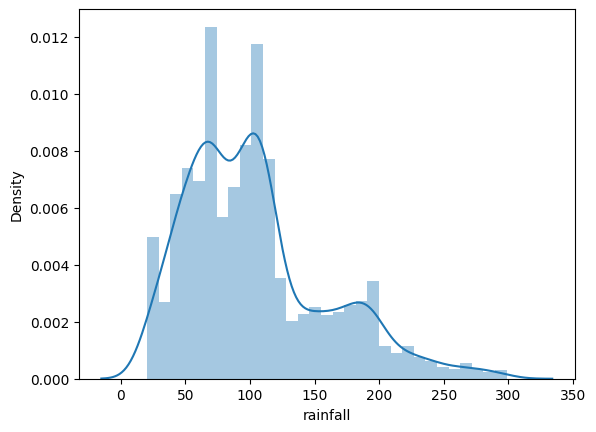

In [13]:
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['N'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['P'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['K'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['temperature'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['humidity'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['ph'])
plt.show()
# GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt
sns.distplot(crop['rainfall'])
plt.show()

In [14]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
crop['crop_num'] = crop['label'].map(crop_dict)

# #ENCODING SECTION
# # creating a dictionary


# #MAPPNG

# crop['crop_num'] = crop['label'].map(crop_dict)

# # print("success mapping")    

In [15]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [16]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [17]:
# crop['label'].value_counts()
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [18]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [19]:
# attribte crop_num rakhera aru sabai drop garne
# inplace means forever
crop.drop('label', axis = 1,  inplace=True)
# crop.drop('crop_num2', axis = 1,  inplace=True)

In [20]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [21]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [22]:
# Assign x=input features (n,p,k...........)
# Assign y=output features (crop_num)
X = crop.drop("crop_num", axis = 1)
y = crop['crop_num']

In [23]:
print(X.shape)
print(y.shape)

(2200, 7)
(2200,)


In [24]:
y.shape

(2200,)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)
# 20% data for test size
# 80% data for train size

In [26]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

In [27]:
y_train

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64

In [28]:
X_train.shape # train set get 1760 data and test remaining data

(1760, 7)

In [29]:
X_test.shape

(440, 7)

In [30]:
1760+440

2200

In [31]:
# INPUTS: X_train and X_test
#1760 rows
X_train 

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [32]:
# INPUTS: X_train and X_test
#440 rows
X_test 

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [33]:
# minmax scalar and standarisation for algorithm to implement better
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
#TRAINING
# fitting 80% training data in minmaxscaler
ms.fit(X_train)
X_train = ms.transform(X_train)
X_test = ms.transform(X_test)

In [34]:
X_train
#SUMMARY
# here we have summarised all data in the minmax range of (0, 1)

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [35]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

In [36]:
#STANDARISATION
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [37]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [ ]:
import numpy as np
from collections import Counter
from typing import List, Tuple, Union, Dict
import random
# MODEL TRAINING
class KNN:
    def __init__(self, k: int = 3):
        """K-Nearest Neighbors classifier.
        
        Args:
            k (int): Number of neighbors to consider
        """
        self.k = k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Store training data.
        
        Args:
            X: Training features
            y: Training labels
        """
        self.X_train = X
        self.y_train = y
    
    def _euclidean_distance(self, x1: np.ndarray, x2: np.ndarray) -> float:
        """Calculate Euclidean distance between two points."""
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels for samples in X.
        
        Args:
            X: Samples to predict
            
        Returns:
            Predicted class labels
        """
        predictions = []
        
        for x in X:
            # Calculate distances to all training samples
            distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Get indices of k nearest neighbors
            k_indices = np.argsort(distances)[:self.k]
            
            # Get labels of k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            
            # Majority vote
            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])
            
        return np.array(predictions)

class DecisionTree:
    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value
    
    def __init__(self, max_depth: int = None):
        """Decision Tree classifier.
        
        Args:
            max_depth: Maximum depth of the tree
        """
        self.max_depth = max_depth
        self.root = None
        
    def _entropy(self, y: np.ndarray) -> float:
        """Calculate entropy of an array of labels."""
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])
    
    def _information_gain(self, y: np.ndarray, X_column: np.ndarray, threshold: float) -> float:
        """Calculate information gain for a split."""
        parent_entropy = self._entropy(y)
        
        left_mask = X_column < threshold
        right_mask = ~left_mask
        
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0
        
        n = len(y)
        n_l, n_r = np.sum(left_mask), np.sum(right_mask)
        e_l, e_r = self._entropy(y[left_mask]), self._entropy(y[right_mask])
        child_entropy = (n_l * e_l + n_r * e_r) / n
        
        return parent_entropy - child_entropy
    
    def _best_split(self, X: np.ndarray, y: np.ndarray) -> Tuple[int, float]:
        """Find the best split."""
        best_gain = -1
        best_feature = None
        best_threshold = None
        
        n_features = X.shape[1]
        
        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                gain = self._information_gain(y, X[:, feature], threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
                    
        return best_feature, best_threshold
    
    def _build_tree(self, X: np.ndarray, y: np.ndarray, depth: int = 0) -> Node:
        """Recursively build the decision tree."""
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        
        # Stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth) or n_classes == 1:
            leaf_value = np.argmax(np.bincount(y))
            return self.Node(value=leaf_value)
        
        # Find best split
        best_feature, best_threshold = self._best_split(X, y)
        
        if best_feature is None:
            leaf_value = np.argmax(np.bincount(y))
            return self.Node(value=leaf_value)
        
        # Create child nodes
        left_mask = X[:, best_feature] < best_threshold
        right_mask = ~left_mask
        
        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)
        
        return self.Node(best_feature, best_threshold, left, right)
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Build decision tree."""
        self.root = self._build_tree(X, y)
    
    def _traverse_tree(self, x: np.ndarray, node: Node) -> int:
        """Traverse tree to make prediction."""
        if node.value is not None:
            return node.value
        
        if x[node.feature] < node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels."""
        return np.array([self._traverse_tree(x, self.root) for x in X])
    

class NaiveBayes:
    def __init__(self):
        """Naive Bayes classifier."""
        self.classes = None
        self.parameters = {}
        
    def _calculate_class_parameters(self, X: np.ndarray) -> Tuple[float, float]:
        """Calculate mean and variance of features."""
        mean = np.mean(X, axis=0)
        var = np.var(X, axis=0)
        return mean, var
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Train Naive Bayes classifier."""
        self.classes = np.unique(y)
        n_features = X.shape[1]
        
        # Calculate parameters for each class
        for c in self.classes:
            X_c = X[y == c]
            self.parameters[c] = {
                'mean': np.zeros(n_features),
                'var': np.zeros(n_features),
                'prior': len(X_c) / len(X)
            }
            
            mean, var = self._calculate_class_parameters(X_c)
            self.parameters[c]['mean'] = mean
            self.parameters[c]['var'] = var
    
    def _calculate_likelihood(self, X: np.ndarray, mean: float, var: float) -> float:
        """Calculate likelihood using Gaussian distribution."""
        eps = 1e-4  # to avoid division by zero
        coeff = 1.0 / np.sqrt(2.0 * np.pi * var + eps)
        exponent = np.exp(-(X - mean)**2 / (2 * var + eps))
        return coeff * exponent
    
    def _calculate_posterior(self, x: np.ndarray, c: int) -> float:
        """Calculate posterior probability."""
        prior = np.log(self.parameters[c]['prior'])
        likelihood = np.sum(np.log(self._calculate_likelihood(x, 
                                                            self.parameters[c]['mean'],
                                                            self.parameters[c]['var'])))
        return prior + likelihood
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels."""
        y_pred = []
        
        for x in X:
            posteriors = []
            for c in self.classes:
                posterior = self._calculate_posterior(x, c)
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
            
        return np.array(y_pred)


class RandomForest:
    def __init__(self, n_trees: int = 10, max_depth: int = None):
        """Random Forest classifier.
        
        Args:
            n_trees: Number of trees in the forest
            max_depth: Maximum depth of each tree
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        
    def _bootstrap_sample(self, X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        """Create a bootstrap sample."""
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[idxs], y[idxs]
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """Build a forest of trees."""
        self.trees = []
        
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict class labels by majority voting."""
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([Counter(predictions[:, i]).most_common(1)[0][0] 
                        for i in range(len(X))])

from sklearn.metrics import accuracy_score


# sabai model ko lai instance create gareko.
# SYNTAX:
# 'key': value
models = {
    'Naive Bayes            Classification': NaiveBayes(),
    'K-Nearest Neighbors    Classification': KNN(),
    'Decision Tree          Classification': DecisionTree(),
    'Random Forest          Classification': RandomForest(),
}

for name, md in models.items():
    md.fit(X_train, y_train)
    ypred = md.predict(X_test)
    print(f"{name} => accuracy rate is: {accuracy_score(y_test, ypred)}")
    

Naive Bayes            Classification => accuracy rate is: 0.9954545454545455
K-Nearest Neighbors    Classification => accuracy rate is: 0.9704545454545455
Decision Tree          Classification => accuracy rate is: 0.9840909090909091
Random Forest          Classification => accuracy rate is: 0.9931818181818182


In [39]:
y_train

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64

In [ ]:
# RANDOM FOREST
varRFC = RandomForest()
varRFC.fit(X_train, y_train)
ypred = varRFC.predict(X_test)
accuracy_valueRFC = accuracy_score(y_test, ypred)
print(f"Accuracy = {accuracy_valueRFC} (RANDOM FOREST)")
# same as the above result individually


# NAIVE BAYS
varNB = NaiveBayes()
varNB.fit(X_train, y_train)
ypred = varNB.predict(X_test)
accuracy_valueNB = accuracy_score(y_test, ypred)
print(f"Accuracy = {accuracy_valueNB} (GAUSIAN NAIVE BAYS)")



# DECISION TREEE CLASSIFICATION
varDT = DecisionTree()
varDT.fit(X_train, y_train)
ypred = varDT.predict(X_test)
accuracy_valueDTC = accuracy_score(y_test, ypred)
print(f"Accuracy = {accuracy_valueDTC} (DECISION TREE)")


# K-NEAREST NEIGHBOUR
varKNN = KNN()
varKNN.fit(X_train, y_train)
ypred = varKNN.predict(X_test)
accuracy_valueKNN = accuracy_score(y_test, ypred)
print(f"Accuracy = {accuracy_valueKNN} (K-NEAREST)")

Accuracy = 0.9931818181818182 (RANDOM FOREST)
Accuracy = 0.9954545454545455 (GAUSIAN NAIVE BAYS)
Accuracy = 0.9818181818181818 (DECISION TREE)
Accuracy = 0.9704545454545455 (K-NEAREST)


In [41]:
import pickle
pickle.dump(varRFC,open('modelRFC.pkl', 'wb'))
pickle.dump(accuracy_valueRFC, open('accuracy_modelRFC.pkl', 'wb'))
pickle.dump(accuracy_valueNB, open('accuracy_modelNB.pkl', 'wb'))
pickle.dump(accuracy_valueDTC, open('accuracy_modelDT.pkl', 'wb'))
pickle.dump(accuracy_valueKNN, open('accuracy_modelKNN.pkl', 'wb'))

In [42]:
crop_dict = {
    1: "rice",
    2: 'maize',
    3: 'jute',
    4: 'cotton',
    5: 'coconut',
    6: 'papaya',
    7: 'orange',
    8: 'apple',
    9: 'muskmelon',
    10: 'watermelon',
    11: 'grapes',
    12: 'mango',
    13: 'banana',
    14: 'pomegranate',
    15: 'lentil',
    16: 'blackgram',
    17: 'mungbean',
    18: 'mothbeans',
    19: 'pigeonpeas',
    20: 'kidneybeans',
    21: 'chickpea',
    22: 'coffee'
}

In [43]:
# PREDICTIVE SYSTEM FOR NAIVE-BAYS METHOD----1
# function creating
def recommendation(N,P,K,temperature, humidity, ph, rainfall):
    features = np.array([[N,P,K,temperature, humidity, ph, rainfall]])
    prediction = varNB.predict(features).reshape(1, -1)
    return prediction[0]

N = 99
P = 10
K = 100
temperature = 22
humidity = 4
ph = 5
rainfall = 50

# function calling
predict = recommendation(N,P,K,temperature, humidity, ph, rainfall)

print(predict[0])

if predict[0] in crop_dict:

    crop = crop_dict[predict[0]]
    print(f"#{crop} is the best recommended by (K_NEAREST ALGORITHM)".format(crop))
    print(f"with the accuracy rate of {accuracy_valueKNN}")
else:
    print("Please try again for recommendation")
    

13
#banana is the best recommended by (K_NEAREST ALGORITHM)
with the accuracy rate of 0.9704545454545455


In [44]:
# PREDICTIVE SYSTEM FOR RANDOM FOREST METHOD-------2
# function creating
def recommendation(N,P,K,temperature, humidity, ph, rainfall):
    features = np.array([[N,P,K,temperature, humidity, ph, rainfall]])
    prediction = varRFC.predict(features).reshape(1, -1)
    return prediction[0]

N = 99
P = 10
K = 100
temperature = 22
humidity = 4
ph = 5
rainfall = 50


# function calling
predict = recommendation(N,P,K,temperature, humidity, ph, rainfall)

# crop_dict = {
#     1: "rice",
#     2: 'maize',
#     3: 'jute',
#     4: 'cotton',
#     5: 'coconut',
#     6: 'papaya',
#     7: 'orange',
#     8: 'apple',
#     9: 'muskmelon',
#     10: 'watermelon',
#     11: 'grapes',
#     12: 'mango',
#     13: 'banana',
#     14: 'pomegranate',
#     15: 'lentil',
#     16: 'blackgram',
#     17: 'mungbean',
#     18: 'mothbeans',
#     19: 'pigeonpeas',
#     20: 'kidneybeans',
#     21: 'chickpea',
#     22: 'coffee'
# }

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print(f"#{crop} is the best recommended by (RANDOM FOREST)".format(crop))
    print(f"with the accuracy rate of {accuracy_valueRFC}")
else:
    print("Please try again for recommendation")
    

#apple is the best recommended by (RANDOM FOREST)
with the accuracy rate of 0.9931818181818182


In [45]:
# PREDICTIVE SYSTEM FOR DECISION TREE METHOD-------3
# function creating
def recommendation(N,P,K,temperature, humidity, ph, rainfall):
    features = np.array([[N,P,K,temperature, humidity, ph, rainfall]])
    prediction = varDT.predict(features).reshape(1, -1)
    return prediction[0]

N = 99
P = 10
K = 100
temperature = 22
humidity = 4
ph = 5
rainfall = 50


# function calling
predict = recommendation(N,P,K,temperature, humidity, ph, rainfall)

# crop_dict = {
#     1: "rice",
#     2: 'maize',
#     3: 'jute',
#     4: 'cotton',
#     5: 'coconut',
#     6: 'papaya',
#     7: 'orange',
#     8: 'apple',
#     9: 'muskmelon',
#     10: 'watermelon',
#     11: 'grapes',
#     12: 'mango',
#     13: 'banana',
#     14: 'pomegranate',
#     15: 'lentil',
#     16: 'blackgram',
#     17: 'mungbean',
#     18: 'mothbeans',
#     19: 'pigeonpeas',
#     20: 'kidneybeans',
#     21: 'chickpea',
#     22: 'coffee'
# }

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print(f"{crop} is the best recommended by (DECISION TREE)".format(crop))
    print(f"with the accuracy rate of {accuracy_valueDTC}")
else:
    print("Please try again for recommendation")
    

apple is the best recommended by (DECISION TREE)
with the accuracy rate of 0.9818181818181818


In [46]:
# PREDICTIVE SYSTEM FOR K-NEAREST METHOD----------4
# function creating
def recommendation(N,P,K,temperature, humidity, ph, rainfall):
    features = np.array([[N,P,K,temperature, humidity, ph, rainfall]])
    prediction = varKNN.predict(features).reshape(1, -1)
    return prediction[0]

N = 99
P = 10
K = 100
temperature = 22
humidity = 4
ph = 5
rainfall = 50


# function calling
predict = recommendation(N,P,K,temperature, humidity, ph, rainfall)

# crop_dict = {
#     1: "rice",
#     2: 'maize',
#     3: 'jute',
#     4: 'cotton',
#     5: 'coconut',
#     6: 'papaya',
#     7: 'orange',
#     8: 'apple',
#     9: 'muskmelon',
#     10: 'watermelon',
#     11: 'grapes',
#     12: 'mango',
#     13: 'banana',
#     14: 'pomegranate',
#     15: 'lentil',
#     16: 'blackgram',
#     17: 'mungbean',
#     18: 'mothbeans',
#     19: 'pigeonpeas',
#     20: 'kidneybeans',
#     21: 'chickpea',
#     22: 'coffee'
# }

if predict[0] in crop_dict:
    crop = crop_dict[predict[0]]
    print(f"#{crop} is the best recommended by (K_NEAREST ALGORITHM)".format(crop))
    print(f"with the accuracy rate of {accuracy_valueKNN}")
else:
    print("Please try again for recommendation")
    

#grapes is the best recommended by (K_NEAREST ALGORITHM)
with the accuracy rate of 0.9704545454545455


In [47]:
crop_dict

{1: 'rice',
 2: 'maize',
 3: 'jute',
 4: 'cotton',
 5: 'coconut',
 6: 'papaya',
 7: 'orange',
 8: 'apple',
 9: 'muskmelon',
 10: 'watermelon',
 11: 'grapes',
 12: 'mango',
 13: 'banana',
 14: 'pomegranate',
 15: 'lentil',
 16: 'blackgram',
 17: 'mungbean',
 18: 'mothbeans',
 19: 'pigeonpeas',
 20: 'kidneybeans',
 21: 'chickpea',
 22: 'coffee'}

In [48]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

In [49]:
ypred

array([ 9, 10,  6,  6,  8, 12,  8, 18, 17, 15, 16,  5, 14,  3,  5, 14,  8,
        2,  6,  9, 22,  6,  7,  6, 21,  3, 17,  7, 19,  3, 14, 15,  3, 15,
        3, 16,  3, 21, 21, 20,  6, 12, 16,  2, 17,  2, 19,  5,  9,  2, 16,
       22, 11, 17, 22, 20,  4,  8, 13, 15, 10,  5, 15,  7,  6, 16,  7,  1,
        9, 19,  9,  5,  3, 13, 16,  6, 13,  4, 10,  7, 22, 21,  1, 18,  7,
       12, 22, 18, 16, 14,  2, 18,  4,  6, 19, 18, 20, 22, 16, 15,  5,  3,
        7,  9, 10, 20, 10, 13, 19, 18, 13,  3,  4, 14, 19, 21,  2,  5, 14,
        1, 19, 11, 16,  5, 21, 16,  5,  2, 13, 18, 13, 20, 14, 21,  5,  7,
       19, 13, 13,  8, 20,  9, 17, 18,  5,  2,  8,  5, 20, 18, 17, 15, 10,
       17, 19, 19, 19, 20,  2,  3, 21,  8,  7,  4,  1,  5, 11, 15, 10, 11,
       11, 16, 14, 21,  5,  2, 15, 11, 10,  3, 22, 22, 20,  3, 18, 20, 13,
       20,  5,  6,  6, 17, 12, 14, 10, 20,  2,  8, 16, 21, 11, 11, 13,  4,
        1, 14, 17, 13,  3, 17,  2, 21, 21, 21,  8,  1, 20,  6, 22, 16, 20,
       12, 12,  5,  6,  8

In [50]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred, labels=[0,1])
print("Confusion Matris is:")
print(cm)

Confusion Matris is:
[[ 0  0]
 [ 0 14]]


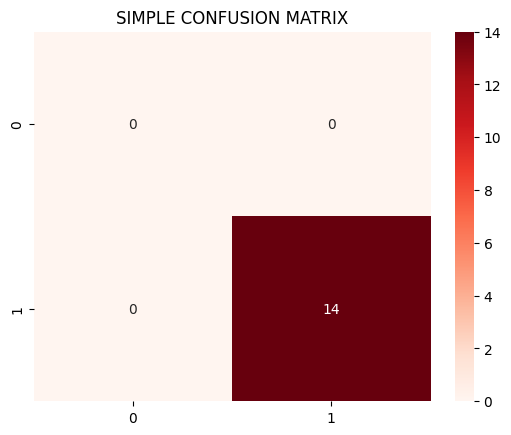

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, cmap="Reds", annot=True, cbar_kws={"orientation":"vertical"})
plt.title("SIMPLE CONFUSION MATRIX")
plt.show()

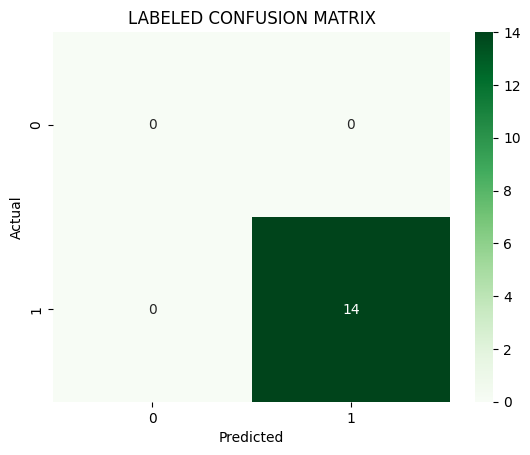

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, cmap="Greens", annot=True, cbar_kws={"orientation":"vertical"})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LABELED CONFUSION MATRIX")
plt.show()

Normalised Confusion Matris is:
[[nan nan]
 [ 0.  1.]]


/tmp/ipykernel_22485/514110772.py:4: RuntimeWarning: invalid value encountered in divide
  cm_normalised = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)


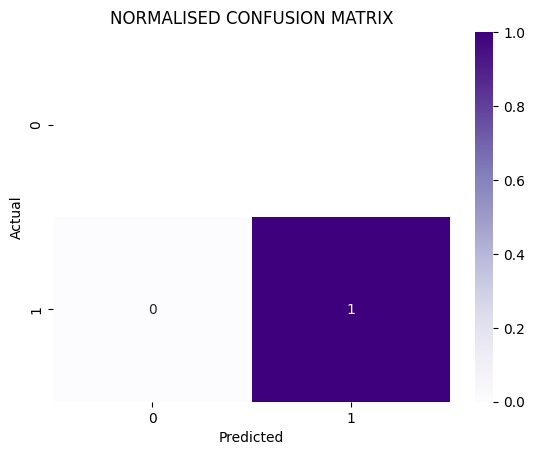

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred, labels=[0,1])
cm_normalised = np.round(cm/np.sum(cm,axis=1).reshape(-1,1),2)

print("Normalised Confusion Matris is:")
print(cm_normalised)
import matplotlib.pyplot as plt
sns.heatmap(cm_normalised, cmap="Purples", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("NORMALISED CONFUSION MATRIX")
plt.show()

In [54]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

In [55]:
ypred

array([ 9, 10,  6,  6,  8, 12,  8, 18, 17, 15, 16,  5, 14,  3,  5, 14,  8,
        2,  6,  9, 22,  6,  7,  6, 21,  3, 17,  7, 19,  3, 14, 15,  3, 15,
        3, 16,  3, 21, 21, 20,  6, 12, 16,  2, 17,  2, 19,  5,  9,  2, 16,
       22, 11, 17, 22, 20,  4,  8, 13, 15, 10,  5, 15,  7,  6, 16,  7,  1,
        9, 19,  9,  5,  3, 13, 16,  6, 13,  4, 10,  7, 22, 21,  1, 18,  7,
       12, 22, 18, 16, 14,  2, 18,  4,  6, 19, 18, 20, 22, 16, 15,  5,  3,
        7,  9, 10, 20, 10, 13, 19, 18, 13,  3,  4, 14, 19, 21,  2,  5, 14,
        1, 19, 11, 16,  5, 21, 16,  5,  2, 13, 18, 13, 20, 14, 21,  5,  7,
       19, 13, 13,  8, 20,  9, 17, 18,  5,  2,  8,  5, 20, 18, 17, 15, 10,
       17, 19, 19, 19, 20,  2,  3, 21,  8,  7,  4,  1,  5, 11, 15, 10, 11,
       11, 16, 14, 21,  5,  2, 15, 11, 10,  3, 22, 22, 20,  3, 18, 20, 13,
       20,  5,  6,  6, 17, 12, 14, 10, 20,  2,  8, 16, 21, 11, 11, 13,  4,
        1, 14, 17, 13,  3, 17,  2, 21, 21, 21,  8,  1, 20,  6, 22, 16, 20,
       12, 12,  5,  6,  8

In [56]:
import seaborn as sns
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           1       0.93      0.74      0.82        19
           2       1.00      1.00      1.00        21
           3       0.81      0.96      0.88        23
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        17
          10       1.00      1.00      1.00        19
          11       1.00      1.00      1.00        14
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        23
          15       0.73      1.00      0.85        11
          16       0.95      0.95      0.95        20
          17       1.00      1.00      1.00        19
          18       1.00    

In [57]:
# MODEL GENERATION
# HOW TO GENERATE MODEL
import pickle
pickle.dump(varRFC,open('modelRFC.pkl', 'wb'))
pickle.dump(varNB,open('modelNB.pkl', 'wb'))
pickle.dump(varDT,open('modelDT.pkl', 'wb'))
pickle.dump(varKNN,open('modelKNN.pkl', 'wb'))